# DSO106 MachineLearn L5 Natural Language Processing - Hands On

## packages

In [1]:
conda install nltk

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nolan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Read in text

In [3]:
url = 'https://www.gutenberg.org/files/11/11-h/11-h.htm'
r = requests.get(url)
type(r)

requests.models.Response

## Convert Text to Soup

In [4]:
html = r.text
soup = BeautifulSoup(html,"html.parser")
type(soup)

bs4.BeautifulSoup

In [5]:
soup.title.string

'The Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll'

## Tokenize Data

In [6]:
text = soup.get_text()
tokenizer = RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(text)
tokens[:30]

['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'Alice',
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 'The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'Aliceâ',
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 'This',
 'eBook',
 'is',
 'for']

## Remove Capitalization

In [7]:
words = []
for word in tokens:
    words.append(word.lower())

In [9]:
words[:100]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'alice',
 's',
 'adventures',
 'in',
 'wonderland',
 'by',
 'lewis',
 'carroll',
 'the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'aliceâ',
 's',
 'adventures',
 'in',
 'wonderland',
 'by',
 'lewis',
 'carroll',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'in',
 'the',
 'united',
 'states',
 'and',
 'most',
 'other',
 'parts',
 'of',
 'the',
 'world',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'org',
 'if',
 'you',
 'are',
 'not',
 'located',
 'in',
 'the',
 'united',
 'states',
 'you',
 'will',
 'have',
 'to',
 'check',
 'the',
 'laws']

## Remove Stopwords

In [10]:
stopwords = nltk.corpus.stopwords.words('english')

In [11]:
stopwords[:15]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours']

In [12]:
wordsWithoutStops = []
for word in words:
    if word not in stopwords:
        wordsWithoutStops.append(word)

In [13]:
wordsWithoutStops[:35]

['project',
 'gutenberg',
 'ebook',
 'alice',
 'adventures',
 'wonderland',
 'lewis',
 'carroll',
 'project',
 'gutenberg',
 'ebook',
 'aliceâ',
 'adventures',
 'wonderland',
 'lewis',
 'carroll',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'united',
 'states',
 'parts',
 'world',
 'cost',
 'almost',
 'restrictions',
 'whatsoever',
 'may',
 'copy',
 'give',
 'away',
 'use',
 'terms',
 'project']

## Count and Plot Words

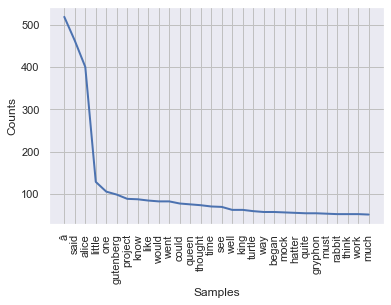

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [15]:
sns.set()
frequencyDis = nltk.FreqDist(wordsWithoutStops)
frequencyDis.plot(30)

### A few more stopwords could be added. For clarity's sake. 